In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
class KNNRegressor:
    def __init__(self,filepath,k):
        self.dataset=pd.read_csv(filepath)
        self.k=k
        self.preprocess()
        self.m = self.X.shape[0]
        self.n = self.X.shape[1]
        self.split_index = int(0.8 * self.m)
        self.split_data()



    def preprocess(self):
        self.correlationdata= self.dataset.drop(columns=['country'])
        self.correlation_matrix = self.correlationdata.corr()
        self.X=self.dataset[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer']].values
        self.Y=self.dataset['gdpp'].values
        self.X = (self.X - self.X.mean(axis=0)) / self.X.std(axis=0)

    

    def split_data(self):
        self.X_train, self.X_test = self.X[:self.split_index], self.X[self.split_index:]
        self.Y_train, self.Y_test = self.Y[:self.split_index], self.Y[self.split_index:]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = [self._predict_single(x) for x in X]
        return np.array(predictions)

    def _predict_single(self, x):
       
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        
        k_indices = np.argsort(distances)[:self.k]
       
        k_nearest_values = self.Y_train[k_indices]
       
        return np.mean(k_nearest_values)
    def r2_score(self, y_true, y_pred):
        total_variance = np.sum((y_true - np.mean(y_true)) ** 2)
        residual_variance = np.sum((y_true - y_pred) ** 2)
        return 1 - (residual_variance / total_variance)

R² Score: 0.9233937794111352


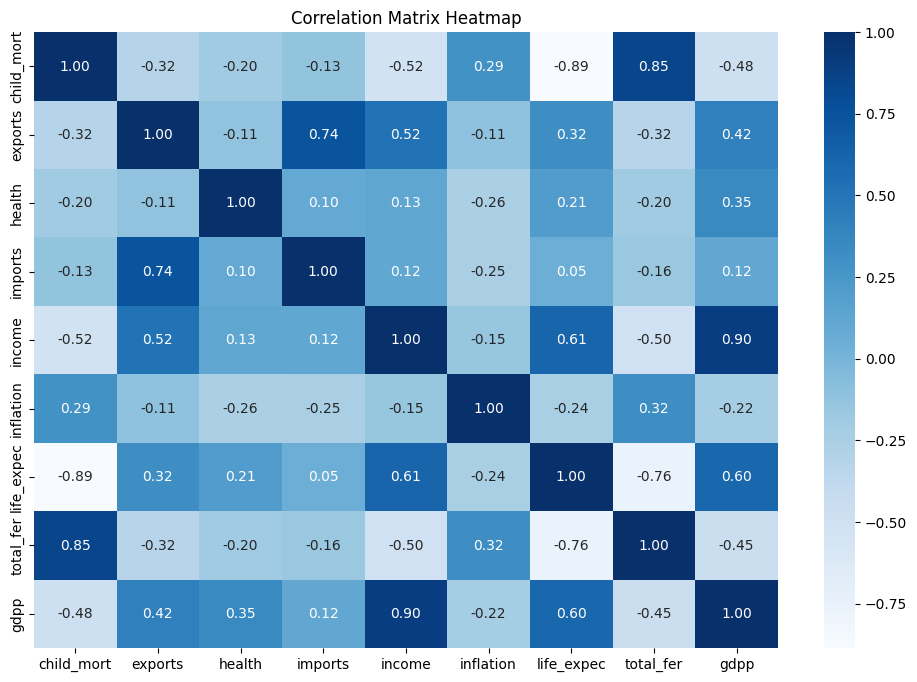

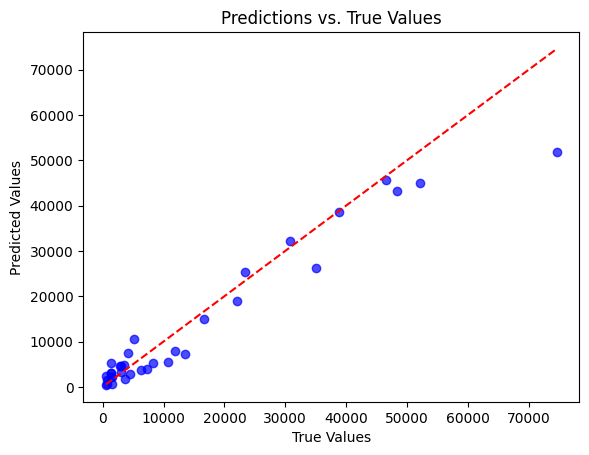

In [11]:
if __name__ == "__main__":
    filepath=r"C:\Users\pkmna\Downloads\data.csv"
    knn=KNNRegressor(filepath,3)
    y_pred=knn.predict(knn.X_test)
    r2 = knn.r2_score(knn.Y_test, y_pred)
    print("R² Score:", r2)
    plt.figure(figsize=(12, 8))
    sns.heatmap(knn.correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
    plt.title("Correlation Matrix Heatmap")
    plt.show()
    plt.scatter(knn.Y_test, y_pred, alpha=0.7, color='blue')
    plt.plot([min(knn.Y_test), max(knn.Y_test)], [min(knn.Y_test), max(knn.Y_test)], color='red', linestyle='--')
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.title("Predictions vs. True Values")
    plt.show()